<a href="https://colab.research.google.com/github/AoujanaAnas/pythonAdvanced/blob/main/Obtains_COVID_19_data_by_crawler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Coronavirus Tracker

In [1]:
import requests as req
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd


##Gt data

In [4]:
# Request data from website
html = req.get("https://www.worldometers.info/coronavirus/")


b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live Update: 215,872,039 Cases and 4,494,436 Deaths from the Coronavirus - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-to
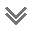

In [5]:
# check downloaded content
html.content

###Parse html

In [6]:
# Parse HTML with BeautifulSoup
html_parsed = BeautifulSoup(html.content)

In [7]:
# Search for the required table
table = html_parsed.find('table' , attrs={'id' : 'main_table_countries_today'})      #information of table who has id = 'main_table_countries_today'


In [8]:
# Check result
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [9]:
# Gt all the rows
rows = table.find_all('tr')

In [14]:
# Check result
rows[4]

<tr class="total_row_world row_continent" data-continent="Europe" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>Europe</nobr>
</td>
<td>54,844,490</td>
<td>+101,965</td>
<td>1,167,382</td>
<td>+1,132</td>
<td>49,889,284</td>
<td>+122,891</td>
<td>3,787,824</td>
<td>11,112</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="Europe" style="display:none;">Europe</td>
<td>
</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
</tr>

In [19]:
# tokenization
rows[9].text.strip().split("\n")      # text.strip() remove all the markers 'HTML balise' 
                                      #because of data sparated by \n we have to split them by \n  (split("\n") ==> to devide string into a list)

['1',
 'USA',
 '39,360,976',
 '+18,823',
 '652,088 ',
 '+132',
 '30,733,978',
 '+1,858',
 '7,974,910',
 '24,812',
 '118,117',
 '1,957',
 '575,692,515',
 '1,727,582',
 '333,236,063 ',
 'North America',
 '85111',
 '56',
 '0.4',
 '23,932']

###Store data

In [28]:
# store rows into list (data)
data = []

for x in rows:
  data.append(x.text.strip().split("\n")[1:5])  # [1:5] get only the first 5 columns (column who has title) 

In [29]:
#Convert a list into DataFrame
df = pd.DataFrame(data)

In [31]:
# Check the DataFrame
df.head()

,0,1,2,3
0,"Country,Other",TotalCases,NewCases,TotalDeaths
1,,"47,226,130","+49,989","985,793"
2,,"69,117,463","+244,918","1,019,640"
3,,"36,769,110","+1,199","1,125,858"
4,,"54,844,490","+101,965","1,167,382"


In [39]:
# Set the first row as the head and remove the second row
df = pd.DataFrame(data[9:] , columns=data[0])     #data[9:] ==> 9 it mean that the first country begin from index 9 in our result So we will slice it from it
                                                  #and set columns name to index 0 ==> loock at lest of USA there is a index who beging from 0 THAT'S IT  

In [40]:
# Check the DataFrame
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths
0,USA,"39,360,976","+18,823","652,088"
1,India,"32,649,066","+46,741","437,400"
2,Brazil,"20,676,561",,"577,605"
3,Russia,"6,844,049","+19,509","180,041"
4,France,"6,693,019",,"113,988"


In [41]:
# Save as csv file
df.to_csv('covid19')

#Visualise

In [42]:
#get the required columns
df_plot = df[['Country,Other' , 'TotalCases']]
#get first 10 rows
df_plot = df_plot[:10]

In [43]:
#Check the DataFrame
df_plot.head()

,"Country,Other",TotalCases
0,USA,"39,360,976"
1,India,"32,649,066"
2,Brazil,"20,676,561"
3,Russia,"6,844,049"
4,France,"6,693,019"


In [ ]:
#remove cammas in digits, and convert string to int
df_plot['TotalCases'] = df_plot['TotalCases'].apply(lambda x: x.replace(',' , '')).astype(int)  
          #!!!!!!!NOTICE!!!!!!!!! THAT FOR ME TO REMEMBRE      #DON'T COMPILE THIS PEACE OF CODE BECAUSE WILL GIVE YOU AN ERROR
                                                                                               #this error is just because i already convert it 
                                                                                            #and when i convert it the second time they give me this error
                                                                                             #int can't convert to int ('stupid hhhhhhhhh')

In [48]:
#Check the DataFrame
df_plot.head()

,"Country,Other",TotalCases
0,USA,39360976
1,India,32649066
2,Brazil,20676561
3,Russia,6844049
4,France,6693019


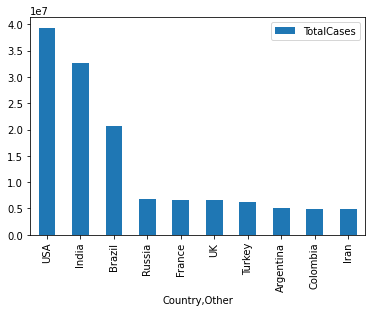

In [52]:
#plot
df_plot.plot(kind='bar' , x='Country,Other' , y='TotalCases')